**K-Fold Cross-Validation** 
is a technique to evaluate a machine learning model’s performance by splitting the dataset into KKK
 equal (or nearly equal) parts, called "folds." The model is trained and tested KKK
 times, each time using a different fold as the test set and the remaining K−1K-1K-1
 folds as the training set. The final performance is the average across all KKK
 runs.



In [28]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from matplotlib import pyplot as plt


(100, 2) (100,)


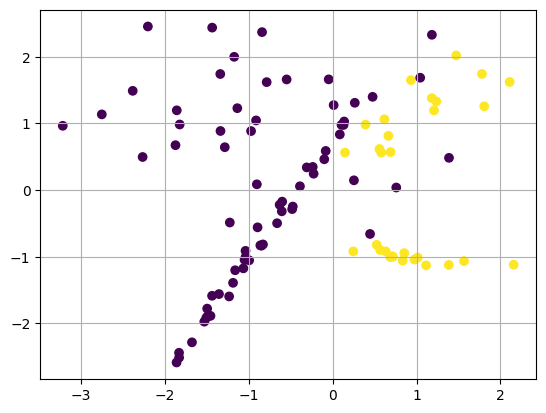

In [33]:
X,y = make_classification(n_samples = 100, n_features = 2, n_informative = 2, 
n_redundant = 0, n_classes = 2, weights = [0.7, 0.3], random_state = 420)
print(X.shape, y.shape)
plt.scatter(X[:,0],X[:,1], c = y) 
plt.grid()

<generator object _BaseKFold.split at 0x0000023A40581030>
Fold:1
train indices: [1 2 3 4]...(total80)
test indices:[ 0  7 12 13]...(total20)
test labels: [1 0 0 1]...(total:20)
predicted labes: [1 0 0 1]...(total: 20)
accuracy: 0.90 
-----------------------------
Fold:2
train indices: [0 1 2 4]...(total80)
test indices:[ 3 15 16 20]...(total20)
test labels: [1 0 0 1]...(total:20)
predicted labes: [1 0 0 1]...(total: 20)
accuracy: 0.90 
-----------------------------
Fold:3
train indices: [0 2 3 4]...(total80)
test indices:[ 1 22 29 32]...(total20)
test labels: [0 1 0 1]...(total:20)
predicted labes: [0 1 0 1]...(total: 20)
accuracy: 0.85 
-----------------------------
Fold:4
train indices: [0 1 3 4]...(total80)
test indices:[2 5 8 9]...(total20)
test labels: [0 0 1 0]...(total:20)
predicted labes: [0 0 1 0]...(total: 20)
accuracy: 0.95 
-----------------------------
Fold:5
train indices: [0 1 2 3]...(total80)
test indices:[ 4  6 10 14]...(total20)
test labels: [0 0 0 0]...(total:20)
pre

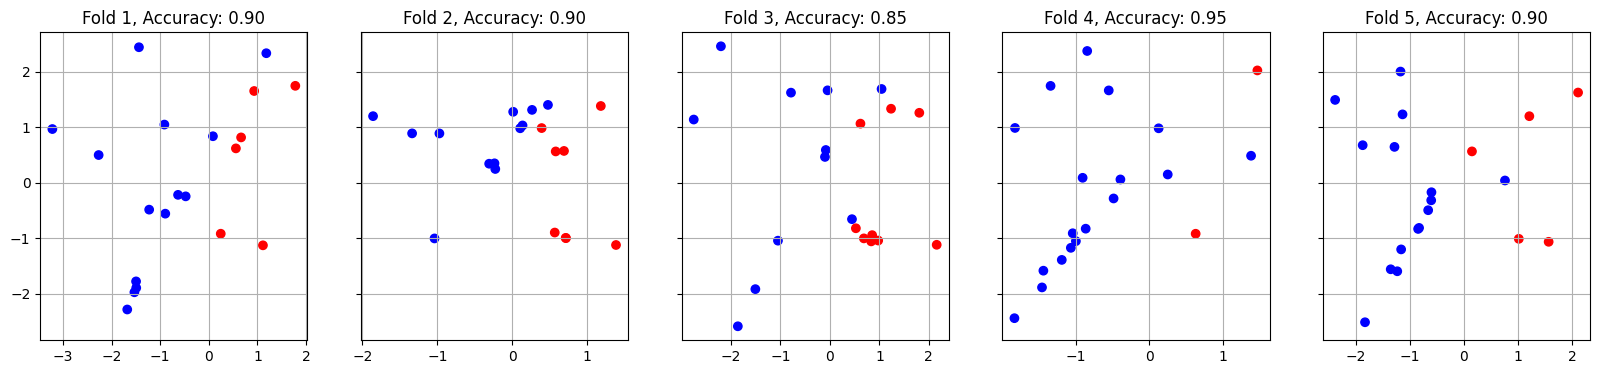

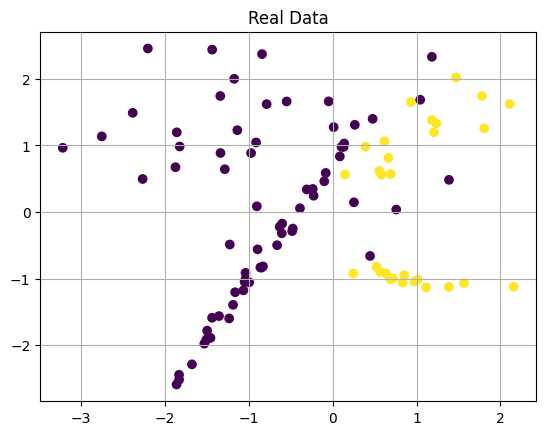

In [52]:
k = 5
kf = KFold(n_splits = k, shuffle = True, random_state = 420) 
scores = []
fold_num = 1
print(kf.split(X))
fig, axes = plt.subplots(1,k, figsize = (20,4), sharey = True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression(random_state = 420)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f"Fold:{fold_num}")
    print(f"train indices: {train_index[:4]}...(total{len(train_index)})")
    print( f"test indices:{test_index[:4]}...(total{len(test_index)})")
    print(f"test labels: {y_test[:4]}...(total:{len(y_test)})")
    print(f"predicted labes: {y_pred[:4]}...(total: {len(y_pred)})")
    print(f"accuracy: {score:.2f} ")
    print("-----------------------------")
    ax = axes[fold_num-1]
    ax.scatter(X_test[:,0], X_test[:,1], c = y_test, cmap = 'bwr')
    ax.set_title(f"Fold {fold_num}, Accuracy: {score:.2f}")
    ax.grid()
    fold_num += 1
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"Mean Accuracy: {mean_score:.3f}")
print(f"Standard Deviation: {std_score:.3f}")
plt.show()
plt.scatter(X[:,0],X[:,1], c = y)
plt.title("Real Data")
plt.grid()

    

